## Importing packages

In [200]:
import pandas as pd
import re
import datetime as dt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
# to avoid warnings
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

In [201]:
data = pd.read_csv("top_toilets.csv",index_col=0)
top_toilets = data

## Exploring geo-distance for sanity check

In [202]:
# Fake user data
user_coordinates=[52.52646152725616, 13.376623742933933]
lat1 = radians(52.52646152725616)
lon1 = radians(13.376623742933933)

In [203]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0
data['lat2'] = np.radians(data['Latitude'])
data['lon2'] = np.radians(data['Longitude'])

data['dlon'] = data['lon2'] - lon1
data['dlat'] = data['lat2'] - lat1

data['a'] = np.sin(data['dlat'] / 2)**2 + cos(lat1) * np.cos(data['lat2']) * np.sin(data['dlon'] / 2)**2
data['c'] = 2 * np.arctan2(np.sqrt(data['a'] ), np.sqrt(1 - data['a'] ))

data['geo_distance'] = R * data['c']

data['geo_distance']

96      6.385688
231     5.302215
236     6.939506
289     3.979169
253     2.119548
         ...    
383    11.257878
386    14.562890
391     9.097637
403     9.697514
353    19.926311
Name: geo_distance, Length: 440, dtype: float64

In [204]:
data['geo_distance'].nsmallest(5)

157    0.296527
161    1.124653
294    1.140087
271    1.399000
360    1.436327
Name: geo_distance, dtype: float64

# Exploring clustering with kmeans

#### Distortion is the average of the euclidean squared distance from the centroid of the respective clusters. Inertia is the sum of squared distances of samples to their closest cluster centre.

In [205]:
## We try different methods to find the best combination of k and clusters

In [206]:
# elbow method 
#The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) 
#and then for each value of k computes an average score for all clusters. By default, the distortion 
#score is computed, the sum of square distances from each point to its assigned center.

In [207]:
coords = top_toilets[['Latitude','Longitude']]

distortions = []
K = range(1,100)
for k in K:
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel = kmeansModel.fit(coords)
    distortions.append(kmeansModel.inertia_)

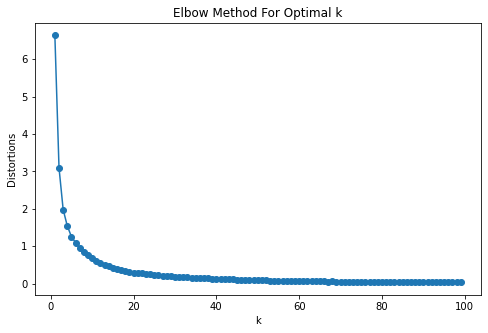

In [208]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(K, distortions, marker='o')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('Elbow Method For Optimal k')
plt.savefig('elbow.png')
plt.show()

In [209]:
# Using this method we are not getting the best results

In [210]:
# Using silhoette score to estimate the best k and number of clusters

In [211]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 50

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(coords)
    labels = kmeans.labels_
    sil.append(silhouette_score(coords, labels, metric = 'euclidean'))

In [212]:
sil

[0.43360304627202584,
 0.4068879491965521,
 0.35807052851407906,
 0.37443738823815576,
 0.34084651038275277,
 0.349369952936406,
 0.33194640256110275,
 0.36066378933948456,
 0.3674135631421144,
 0.3597685025415803,
 0.3679952093595265,
 0.3580778899773875,
 0.35465007343734917,
 0.36834581791978266,
 0.378490307669744,
 0.3740514918144709,
 0.37708968470064863,
 0.37956710165796026,
 0.3858079606075616,
 0.37233132128491014,
 0.37822511599788594,
 0.3893020317504123,
 0.36876908880213183,
 0.3742229648029054,
 0.3788302976255783,
 0.3708085280392472,
 0.38112911104344016,
 0.38603161816680903,
 0.37943142082880094,
 0.37683441710549215,
 0.3811784613438789,
 0.39326387418914693,
 0.38076095885758654,
 0.39297669117701356,
 0.39397806330191537,
 0.39285934933410305,
 0.38380402975572464,
 0.3976972773802961,
 0.3830111366265281,
 0.39684991229487643,
 0.39471958860087786,
 0.3927824901491579,
 0.3999484551615568,
 0.39243148619319923,
 0.40449951083885416,
 0.3995682547773971,
 0.403257

In [213]:
# 98 has the highest silhouete score

In [214]:
kmeans = KMeans(n_clusters=98, init='k-means++')
kmeans.fit(coords)
y = kmeans.labels_
print("k = 5", " silhouette_score ", silhouette_score(coords, y, metric='euclidean'))

k = 5  silhouette_score  0.40110243529529066


In [215]:
top_toilets['cluster'] = kmeans.predict(top_toilets[['Latitude','Longitude']])
top_toilets.head()

,LavatoryID,Description,City,Street,opening_hours,street_address,PostalCode,Country,Longitude,Latitude,...,hasUrinal,ratings,lat2,lon2,dlon,dlat,a,c,geo_distance,cluster
96,Wall_120496,"Wall CT, Landsberger Allee",Berlin,Landsberger Allee (0-24 Uhr),0:00-24:00,Landsberger Allee,10369,Deutschland,13.470695,52.531008,...,Yes,30,0.916839,0.235108,0.001642,0.000079,2.509964e-07,0.001002,6.385688,40
231,Wall_123496,"Wall CT, Dominicusstr.",Berlin,Dominicusstr. 16-18 (0-24 Uhr),0:00-24:00,Dominicusstr. 16-18,10825,Deutschland,13.346706,52.482408,...,Yes,30,0.915991,0.232944,-0.000522,-0.000769,1.730481e-07,0.000832,5.302215,14
236,Wall_123501,"Wall CT, Rennbahnstr.",Berlin,Rennbahnstr. ggü. 1-2 (0-24 Uhr),0:00-24:00,Rennbahnstr. ggü. 1-2,13086,Deutschland,13.465894,52.557197,...,Yes,30,0.917296,0.235024,0.001558,0.000536,2.964212e-07,0.001089,6.939506,38
289,Wall_125237,"Wall CT, Afrikanische Str.",Berlin,Afrikanische Str. ggü. 92 (0-24 Uhr),0:00-24:00,Afrikanische Str. ggü. 92,13351,Deutschland,13.336537,52.552641,...,Yes,30,0.917217,0.232766,-0.000700,0.000457,9.746236e-08,0.000624,3.979169,33
253,Wall_123871,"Wall CT, Nettelbeckplatz, Gerichtstr.",Berlin,"Nettelbeckplatz, Gerichtstr. 31 (0-24 Uhr)",0:00-24:00,"Nettelbeckplatz, Gerichtstr. 31",13347,Deutschland,13.368579,52.544878,...,Yes,30,0.917081,0.233326,-0.000140,0.000321,2.765277e-08,0.000333,2.119548,88


In [216]:
def recommend_toilets(df, latitude, longitude, filter):

  filtered_toilets= df.sort_values(by=['geo_distance'], ascending=True)
  if filter=='Free':
    return  filtered_toilets[(filtered_toilets['Price']=='0,00')].iloc[0:4][['LavatoryID', 'Latitude','Longitude',
                                                                        'geo_distance','cluster','ratings']]
  elif filter=='Handicapped':
    return  filtered_toilets[(filtered_toilets['isHandicappedAccessible']=='1')].iloc[0:4][['LavatoryID', 'Latitude','Longitude',
                                                                        'geo_distance','cluster','ratings']]
  else: 
        # Predict the cluster for longitude and latitude provided
    cluster = kmeans.predict(np.array([latitude,longitude]).reshape(1,-1))[0]
    print(cluster)
    # Get the best toilet in this cluster
    return  df[(df['cluster']==cluster)].iloc[0:4][['LavatoryID', 'Latitude','Longitude',
                                                                        'geo_distance','cluster','ratings']] 
# def recommend_toilets(df, latitude, longitude):
#     # Predict the cluster for longitude and latitude provided
#     cluster = kmeans.predict(np.array([latitude,longitude]).reshape(1,-1))[0]
#     print(cluster)
   
#     # Get the best toilet in this cluster
#     return  df[df['cluster']==cluster].iloc[0:5][['LavatoryID', 'Latitude','Longitude','geo_distance','cluster','ratings']]

In [217]:
import plotly_express as px
px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")
#configure_plotly_browser_state()
px.scatter_mapbox(data, lat="Latitude", lon="Longitude",color="cluster",size_max=30, zoom=3, width=800, height=400)

In [218]:
recommend_toilets(top_toilets,52.52646152725616, 13.376623742933933)

26


,LavatoryID,Latitude,Longitude,geo_distance,cluster,ratings
157,Wall_122531,52.528958,13.378163,0.296527,26,22
225,Wall_123487,52.502596,13.377878,2.655921,26,22
360,Fremd_1,52.513760,13.380450,1.436327,26,22
21,Wall_119993,52.514167,13.391500,1.698216,26,19
161,Wall_122575,52.516372,13.375539,1.124653,26,18


In [219]:
near_toilets = data.sort_values(by=['geo_distance'], ascending=True)
near_toilets.iloc[0:5][['LavatoryID', 'Latitude','Longitude','geo_distance','cluster','ratings']]

,LavatoryID,Latitude,Longitude,geo_distance,cluster,ratings
157,Wall_122531,52.528958,13.378163,0.296527,26,22
161,Wall_122575,52.516372,13.375539,1.124653,26,18
294,Wall_3389,52.516609,13.381269,1.140087,26,17
271,Wall_124364,52.537157,13.365744,1.399000,88,14
360,Fremd_1,52.513760,13.380450,1.436327,26,22
